# Graph Coloring Example aka. Frequency Assignment Example

Lucerne University of Applied Sciences and Arts - School of Information Technology

To send information from one cell to another in a cellular network, the transmission ranges of antennas must overlap.
Neighboring antennas must use different frequencies in order to avoid interference problems. There is only a very
limited number of frequencies available. Assign frequencies to antennas such that not two neighboring antennas use the same frequency (visualized as colour).

@author: Tobias Mérinat

Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from ortools.constraint_solver import pywrapcp

%matplotlib inline

#### The example from the lecture

Undirected graph as list of edges

In [2]:
graph = ((4, 1), (1, 0), (4, 0), (1, 3), (3, 0), (3, 2))

Graph size as number of nodes

In [3]:
# Programming exercise: replace this by determining size dynamically from edge list

size = 5

Frequencies / color names

In [4]:
colors = ("red", "blue", "green", "yellow", "orange", "black", "white", "purple")

Maximum number of allowed frequencies/colors

In [5]:
max_colors=3

#### First, solve color/frequency allocation with a given maximum number of colors

Create constraint solver

In [6]:
solver = pywrapcp.Solver("Graph Coloring")

Configure variables including constraint to use at most max_colors colors

In [7]:
#k = len(colors)
nodes = [solver.IntVar(0, max_colors - 1, str(i)) for i in range(size)]  # str(i) is the (optional) name of the var

No neighboring nodes may have the same color

In [8]:
for edge in graph:
    solver.Add(nodes[edge[0]] != nodes[edge[1]])

Some elementary symmetry breaking

In [9]:
solver.Add(nodes[0] == 0)

Configure solver

In [10]:
db = solver.Phase(nodes, solver.INT_VAR_SIMPLE, solver.INT_VALUE_SIMPLE)

Container for solutions (only needed for plotting)

In [11]:
solutions = []

Start solver

In [12]:
solver.NewSearch(db)
while solver.NextSolution():
    for node in nodes:
        print("Node #{} has color {}".format(node.Name(), colors[node.Value()]))
    print("\n")
    solutions.append([n.Value() for n in nodes])

Node #0 has color red
Node #1 has color blue
Node #2 has color red
Node #3 has color green
Node #4 has color green


Node #0 has color red
Node #1 has color blue
Node #2 has color blue
Node #3 has color green
Node #4 has color green


Node #0 has color red
Node #1 has color green
Node #2 has color red
Node #3 has color blue
Node #4 has color blue


Node #0 has color red
Node #1 has color green
Node #2 has color green
Node #3 has color blue
Node #4 has color blue




Cleanup

In [13]:
solver.EndSearch()

Print solver information

In [14]:
print("Solutions: {}".format(solver.Solutions()))
print("Runtime:   {}ms".format(solver.WallTime()))
print("Failures:  {}".format(solver.Failures()))
print("Branches:  {} ".format(solver.Branches()))

Solutions: 4
Runtime:   69ms
Failures:  0
Branches:  6 


Optionally: draw the last solution (needs "pip install matplotlib networkx")

/home/tuxtimo/hslu/modules/hslu-aiso/env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


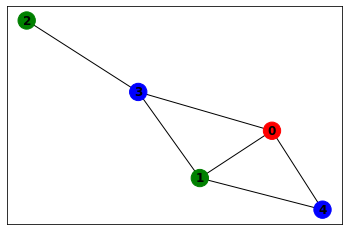

In [15]:
G = nx.Graph()
G.add_nodes_from(range(size))
G.add_edges_from(graph)
nx.draw_networkx(G, with_labels=True, font_weight='bold', node_color=[colors[i] for i in solutions[-1]])
plt.show()

#### Next, solve color/frequency allocation by optimization

Create constraint solver

In [16]:
solver = pywrapcp.Solver("Graph Coloring")

DIFFERENT: Configure variables (without constraint to use at most max_colors colors)

In [17]:
k = len(colors)
nodes = [solver.IntVar(0, k-1, str(i)) for i in range(size)]  # str(i) is the (optional) name of the var

No neighboring nodes may have the same color

In [18]:
for edge in graph:
    solver.Add(nodes[edge[0]] != nodes[edge[1]])

ADDED: objective (minimize the number of colors)

In [19]:
objective = solver.Minimize(solver.Max(nodes).Var(), 1)  # 1 is the step size

Some elementary symmetry breaking

In [20]:
solver.Add(nodes[0] == 0)

Configure solver

In [21]:
db = solver.Phase(nodes, solver.INT_VAR_SIMPLE, solver.INT_VALUE_SIMPLE)

Container for solutions (only needed for plotting)

In [22]:
solutions = []

DIFFERENT: Start solver and add objective to search

In [23]:
solver.NewSearch(db, objective)
while solver.NextSolution():
    print("Coloring with {} colors:".format(objective.Var().Value() + 1))
    for node in nodes:
        print("Node #{} has color {}".format(node.Name(), colors[node.Value()]))
    print("\n")
    solutions.append([n.Value() for n in nodes])

Coloring with 3 colors:
Node #0 has color red
Node #1 has color blue
Node #2 has color red
Node #3 has color green
Node #4 has color green




Cleanup

In [24]:
solver.EndSearch()

Print solver information

In [25]:
print("Solutions: {}".format(solver.Solutions()))
print("Runtime:   {}ms".format(solver.WallTime()))
print("Failures:  {}".format(solver.Failures()))
print("Branches:  {} ".format(solver.Branches()))

Solutions: 1
Runtime:   72ms
Failures:  4
Branches:  4 


Optionally: draw the last solution (needs "pip install matplotlib networkx")

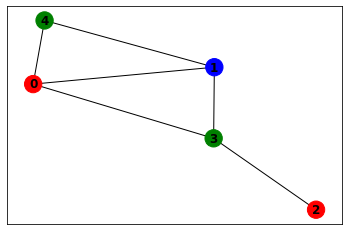

In [26]:
G = nx.Graph()
G.add_nodes_from(range(size))
G.add_edges_from(graph)
nx.draw_networkx(G, with_labels=True, font_weight='bold', node_color=[colors[i] for i in solutions[-1]])
plt.show()

# An even simpler Optimization Problem

This example demonstrates step-wise optimization. Experiment with the step size.
Remember: an assignment of values to variables is called solution, if it fulfills all hard constraints.
Among all solutions, an optimal one is being search.

In [27]:
var = solver.IntVar(0, 20)

solver.Add(var < 18)
solver.Add(var > 0)

step_size = 2
objective = solver.Maximize(var, step_size)

db = solver.Phase([var], solver.INT_VAR_SIMPLE, solver.INT_VALUE_SIMPLE)

solver.NewSearch(db, objective)
while solver.NextSolution():
    print(var.Value())


1
3
5
7
9
11
13
15
17
